# Steady-state light-intensity dependent JV simulation

In [6]:
import os, sys
try:
    import pySIMsalabim as sim
except ImportError: # add parent directory to sys.path if pySIMsalabim is not installed
    sys.path.append('..')
    import pySIMsalabim as sim
from pySIMsalabim.experiments.JV_steady_state import *

### Setup the simulation

In [7]:
# Set the path to the simulation setup file
cwd = os.path.abspath('..')
session_path = os.path.join(cwd, 'SIMsalabim','SimSS')
simss_device_parameters = os.path.join(session_path, 'simulation_setup.txt')

# Set the JV parameters
Gfracs = [0.1,0.5,1.0] # Fractions of the generation rate to simulate
UUID = str(uuid.uuid4())

# Run the JV simulation
ret, mess = run_SS_JV(simss_device_parameters, session_path, JV_file_name = 'JV.dat', varFile= 'Var.dat',G_fracs = Gfracs, parallel = False, max_jobs = 3, UUID=UUID, cmd_pars=[{'par': 'l2.L', 'val': '400e-9'}])

### Plot results

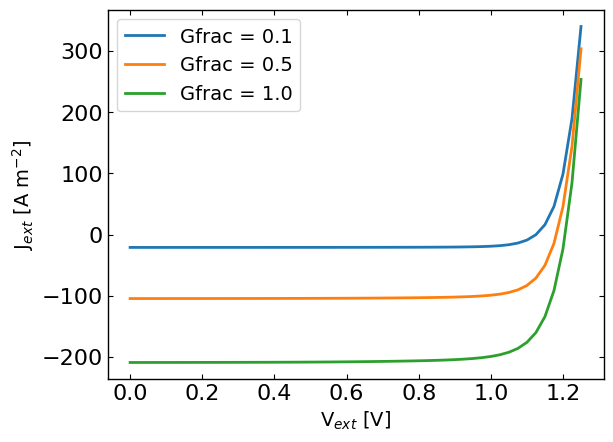

In [8]:
plt.figure()
for Gfrac in Gfracs:
    data = pd.read_csv(os.path.join(session_path,f'JV_Gfrac_{Gfrac}_{UUID}.dat'), sep=r'\s+')
    plt.plot(data['Vext'],data['Jext'],label=f'Gfrac = {Gfrac}')
plt.xlabel('V$_{ext}$ [V]')
plt.ylabel('J$_{ext}$ [A m$^{-2}$]')
plt.legend()
plt.show()

### Plot energy diagram from the input parameters

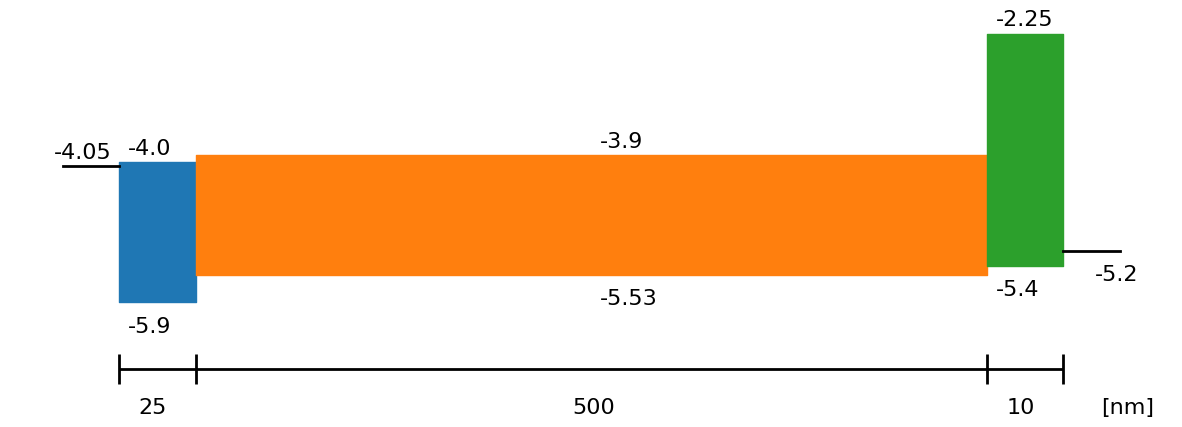

In [9]:
# Plot the energy band diagram of the input file
fig = sim.plot_band_diagram(simss_device_parameters, session_path)

In [10]:
# Clean up the output files (comment out if you want to keep the output files)
sim.clean_all_output(session_path)
sim.delete_folders('tmp',session_path)